In [1]:
import math
import numpy as np
import pandas as pd

from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

RANDOM_STATE = 666666

In [2]:
# Import Data

df = pd.read_csv(r'C:\Users\benhe\Documents\Uni\760\SVM\bow_clean_final.csv', sep=',')
df = df.dropna(subset = ['Age of death'])
X = df[['Short description', 'Gender', 'Country', 'Occupation', 'Birth year']]
Y = df['Age of death']

In [3]:
# LabelEncoder

X_LE = np.zeros((len(X.T), len(X)))
LE = preprocessing.LabelEncoder()
for i in range(len(X.T)):
    LE.fit(X.T.to_numpy()[i])
    X_LE[i] = LE.transform(X.T.to_numpy()[i])
X_LE = X_LE.T

Y_np = Y.to_numpy()

In [4]:
# Standzardization

X_S = np.zeros((len(X_LE.T), len(X_LE)))
for i in range(len(X_LE.T)):
    X_S[i] = (X_LE.T[i]-np.min(X_LE.T[i]))/(np.max(X_LE.T[i])-np.min(X_LE.T[i]))
X_S = X_S.T

In [5]:
# Create training and test data sets

x = X_S
y = Y_np.astype(int)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = RANDOM_STATE)

## SVM

In [6]:
# Choose kernel

for k in ['linear', 'poly', 'rbf']:
    clf = svm.SVR(kernel = k)
    clf.fit(x_train, y_train)
    confidence = clf.score(x_train, y_train)
    print(k, confidence)

linear 0.6133154928309048
poly 0.620965523177973
rbf 0.6331286813640397


In [7]:
# Fit model

Svr = svm.SVR(kernel = 'rbf', C = 6, gamma = 3)
Svr.fit(x_train, y_train)
confidence = Svr.score(x_test, y_test)
pred = Svr.predict(x_test)
print("Confidence: ", confidence)

Confidence:  0.6332807646672924


In [8]:
def RMSE(obs, pred):
    return math.sqrt(pow(np.mean(obs - pred), 2))

## global mean
print("Global mean: ", RMSE(y_test, np.mean(y_test)))

## linear model prediction on the test data
print("Prediction: ", RMSE(y_test, pred))

Global mean:  1.0204845446266025e-15
Prediction:  2.188617144925334


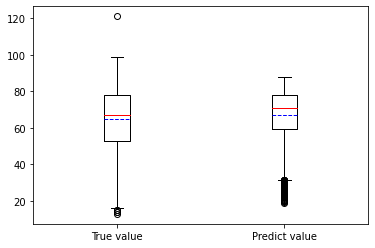

In [9]:
plt.boxplot([y_test, pred], medianprops = {'color': 'red'}, meanline = True, showmeans = True, meanprops = {'color': 'blue', 'ls': '--'}, labels = {'True value', 'Predict value'})
plt.show()

In [12]:
rms = mean_squared_error(y_test, pred, squared=False)
print("Prediction: ", rms)

Prediction:  10.74884054720974
